## Figure 1: Cookies observed per page with different profiles.

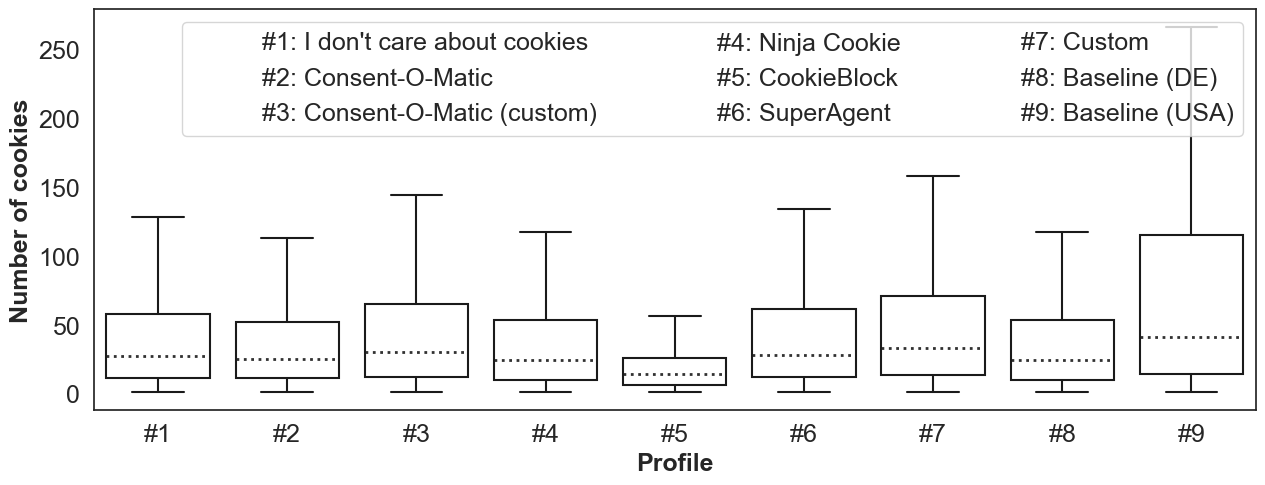

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib
from matplotlib.lines import Line2D

# Data preparation
df = pd.read_csv(os.getcwd() + '/datasets-plots/p3_cookie_per_site_per_profile.csv')

# Plot adjustments
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['axes.labelweight'] = 'bold'
sb.set(rc={'figure.figsize': (13, 5.2), "font.size": 18, "axes.titlesize": 18, "axes.labelsize": 18,
           "legend.fontsize": 18, "xtick.labelsize": 18, "ytick.labelsize": 18}, style="white")

# Generate and safe/show plot
boxplot = sb.boxplot(x="alias", y="ct",                     
                     data=df, showfliers=False, color="white",
                     medianprops=dict(color="red", alpha=0.9,
                                      linestyle=':', linewidth=2.0),
                     flierprops=dict(marker="o", markersize=1))

plt.setp(boxplot.artists, edgecolor = 'k', facecolor='w')
plt.setp(boxplot.lines, color='k')

# Define new labels
new_labels = ["#1", "#2", "#3", "#4", "#5", "#6", "#7", "#8", "#9"]

# Set new labels
boxplot.set_xticklabels(new_labels, rotation=0)

# Define legend labels
legend_labels = ["#1: I don't care about cookies", "#2: Consent-O-Matic", "#3: Consent-O-Matic (custom)",
                 "#4: Ninja Cookie", "#5: CookieBlock", "#6: SuperAgent", "#7: Custom", "#8: Baseline (DE)",
                 "#9: Baseline (USA)"]

# Create custom legend elements
legend_elements = [Line2D([0], [0], marker='None', color='w', label=label, 
                          markerfacecolor='w', markersize=5) for label in legend_labels]

# Add legend inside the plot
plt.legend(handles=legend_elements, loc='upper right', ncol=3)

plt.xlabel("Profile")
plt.ylabel('Number of cookies')
plt.tight_layout()

plt.savefig(os.path.join(os.getcwd(), 'plots', 'p3_cookie_per_site_per_profile.pdf'), dpi=600, transparent=False,
            bbox_inches='tight', format="pdf")


## Figure 2: Number of cookies in the different profiles by cookie usage category.

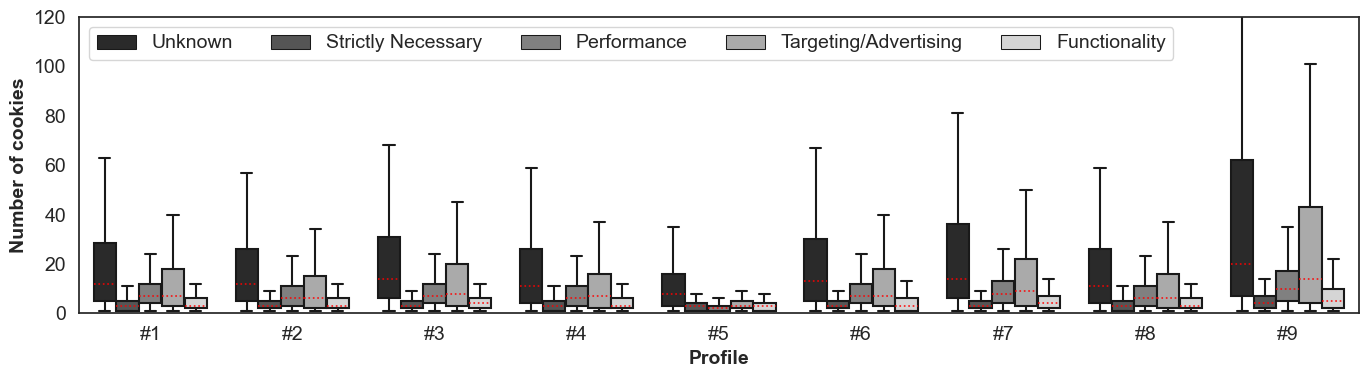

In [2]:
from turtle import position
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib

# Data preparation
df = pd.read_csv(
    os.getcwd() + '/datasets-plots/p4_cookie_cats_per_site_per_profile.csv')

# Plot adjustments
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['axes.labelweight'] = 'bold'
sb.set(rc={'figure.figsize': (14, 4), "font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14,
       "legend.fontsize": 14, "xtick.labelsize": 14, "ytick.labelsize": 14}, style="white")

# Generate and safe/show plot
boxplot = sb.boxplot(x="alias", y="ct",
                     hue="category",
                     data=df, showfliers=False,
                     medianprops=dict(color="red", alpha=0.9,
                                      linestyle=':', linewidth=1.2),
                     flierprops=dict(markerfacecolor="#707070",
                                     marker="o", markersize=1), palette="gray")

boxplot.set(ylim=(0, 120))
plt.legend(loc='upper left', frameon=True, ncol=9)
plt.xlabel("Profile")
plt.ylabel('Number of cookies')
plt.tight_layout()

plt.savefig(os.path.join(os.getcwd(), 'plots', 'p4_cookie_cats_per_site_per_profile.pdf'), dpi=600, transparent=False,
            bbox_inches='tight', format="pdf")


## Figure 3: Similarity of the observed cookies for each cookie type by extension group.

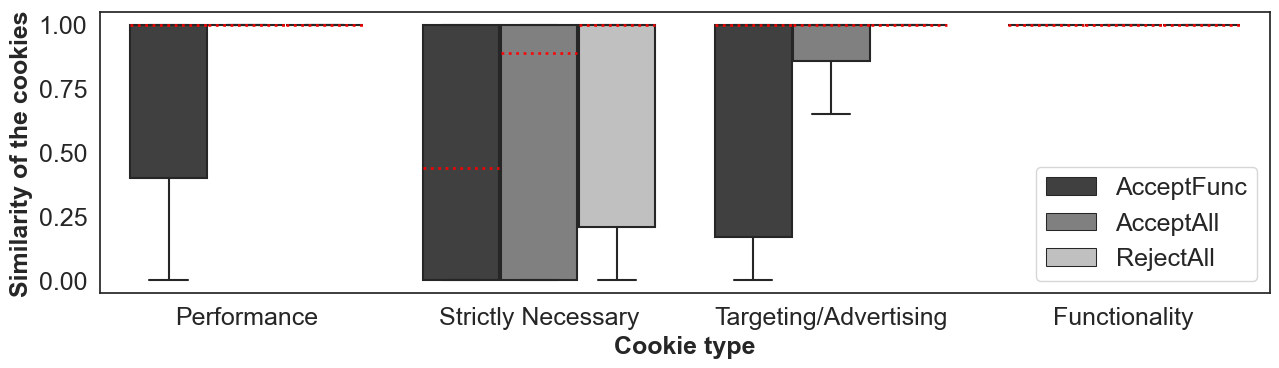

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib

# Data preparation
df = pd.read_csv(os.getcwd() + '/datasets-plots/p7_sim_of_cats_profile.csv')

# Plot adjustments
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['axes.labelweight'] = 'bold'
sb.set(rc={'figure.figsize': (13, 4), "font.size": 18, "axes.titlesize": 18, "axes.labelsize": 18,
       "legend.fontsize": 18, "xtick.labelsize": 18, "ytick.labelsize": 18}, style="white")

# Generate and safe/show plot
boxplot = sb.boxplot(x="analyse", y="sim",
                     hue="gruppe",
                     palette="gray",
                     data=df, showfliers=False,
                     medianprops=dict(color="red", alpha=0.9,
                                      linestyle=':', linewidth=2.0),
                     flierprops=dict(markerfacecolor="#707070",
                                     marker="o", markersize=1))

boxplot.set(ylabel='Similarity', xlabel='Depth')
plt.legend(loc='lower right', frameon=True)
plt.xlabel("Cookie type")
plt.ylabel('Similarity of the cookies')
plt.tight_layout()

plt.savefig(os.path.join(os.getcwd(), 'plots', 'p7_sim_of_cats_profile.pdf'), dpi=600, transparent=False,
            bbox_inches='tight', format="pdf")


## Figure 4: Number of cookies observed in each profile based on the popularity of a site and the type of a cookie.

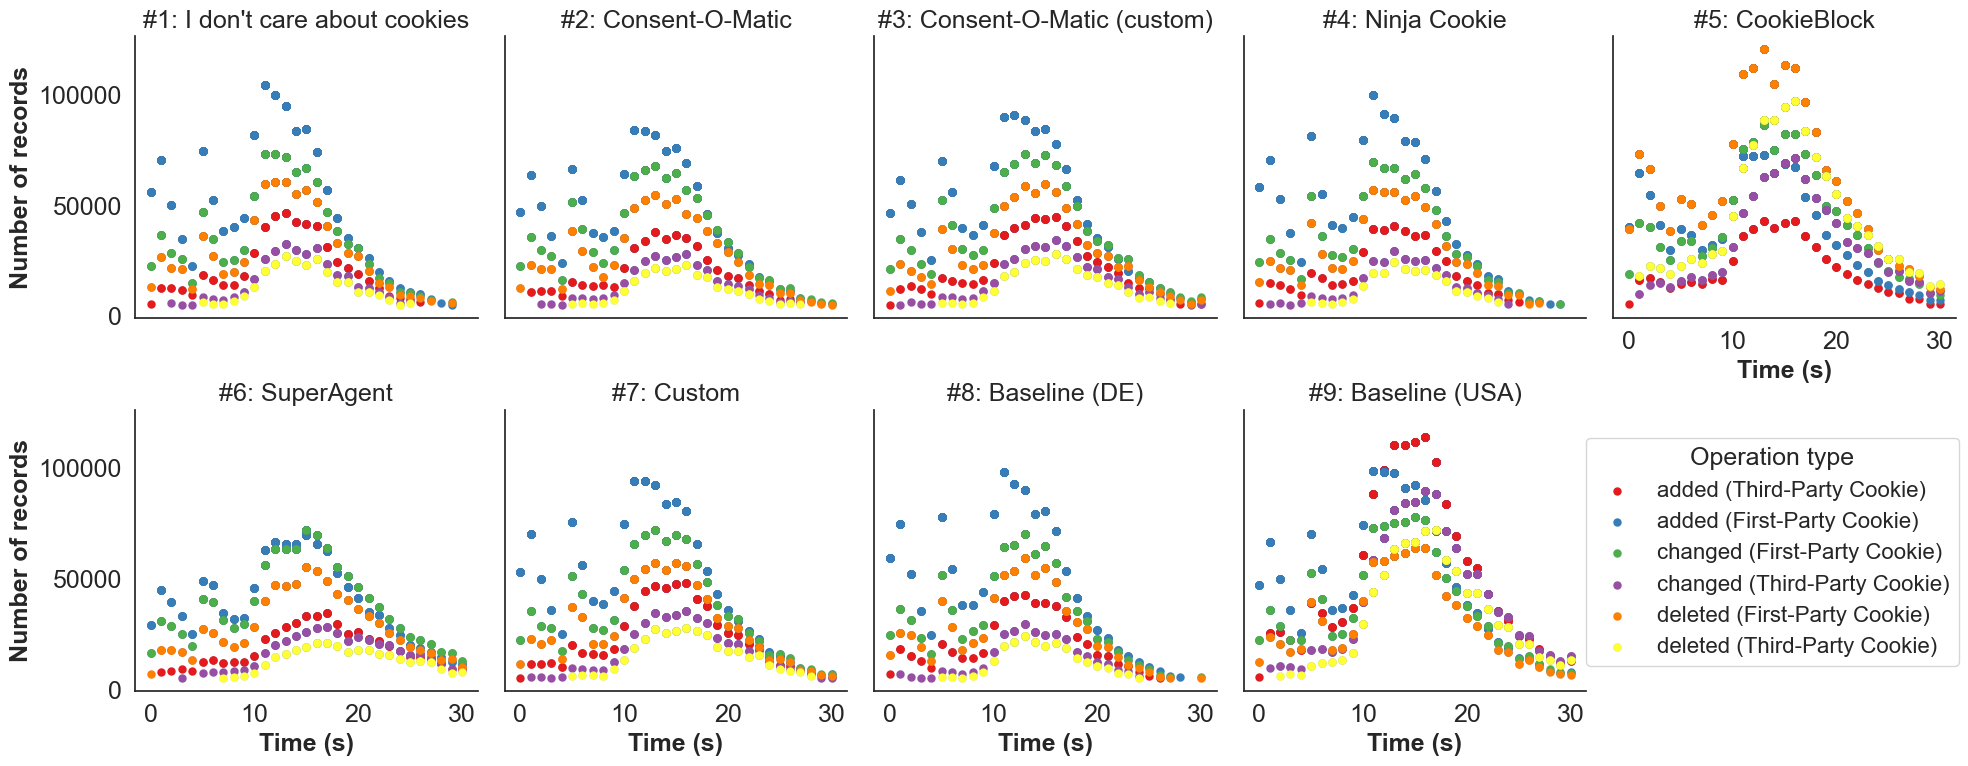

In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib

# Data preparation
df = pd.read_csv(os.getcwd() + '/datasets-plots/p8_time_cookie_ops.csv')

# Plot adjustments
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.labelweight'] = 'bold'
sb.set(rc={'figure.figsize': (16, 4), "font.size": 18, "axes.titlesize": 18, "axes.labelsize": 18,
           "legend.fontsize": 16, "legend.title_fontsize": 18, "xtick.labelsize": 18, "ytick.labelsize": 18}, style="white")

# Build a list of rows for df_clean
rows_list = []
for index, row in df.iterrows():
    for item in range(int(row['number_of_records']/5000)):
        rows_list.append(row)

# Convert the list of rows to a DataFrame
df_clean = pd.DataFrame(rows_list)

g = sb.FacetGrid(df_clean, col='profile', hue='hue', palette="Set1", height=4, col_wrap=5,
                 row_order=['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9'],
                 col_order=['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9'])
g.map(sb.scatterplot, 'time', 'number_of_records', legend=False, edgecolor='b', linewidth=0.05)

axes = g.axes.flatten()
axes[0].set_title("#1: I don't care about cookies")
axes[1].set_title('#2: Consent-O-Matic')
axes[2].set_title('#3: Consent-O-Matic (custom)')
axes[3].set_title('#4: Ninja Cookie')
axes[4].set_title('#5: CookieBlock')
axes[5].set_title('#6: SuperAgent')
axes[6].set_title('#7: Custom')
axes[7].set_title('#8: Baseline (DE)')
axes[8].set_title('#9: Baseline (USA)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.9), borderaxespad=0, title='Operation type')
g.set_ylabels("Number of records")
g.set_xlabels("Time (s)")

g.savefig(os.getcwd() + "/plots/p8_time_cookie_ops.pdf")


## Figure 5: Cookie usage patterns of the analyzed webpages for the different profiles over time.

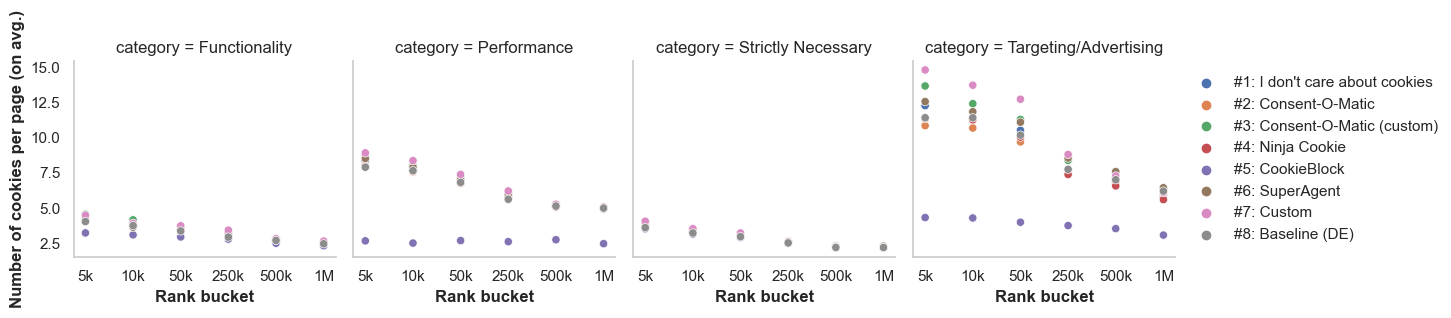

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import os
import matplotlib.font_manager as font_manager
import numpy as np
import matplotlib

# Plot adjustments
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['axes.labelweight'] = 'bold'
sb.set(rc={'figure.figsize': (16, 4), "font.size": 18, "axes.titlesize": 18, "axes.labelsize": 18,
       "legend.fontsize": 16, "legend.title_fontsize": 18, "xtick.labelsize": 18, "ytick.labelsize": 18}, style="white")
sb.set_theme(style="whitegrid")
sb.set_style("whitegrid", {'axes.grid' : False})
font = font_manager.FontProperties(family='sans-serif',
                                   weight='bold',
                                   style='normal', size=16)

df = pd.read_csv(os.getcwd() + "/datasets-plots/p9_cookies_per_rank.csv")

g = sb.FacetGrid(df, col="category" )
g.map_dataframe(sb.scatterplot, x="rank_bucket", y="avg", hue="alias" )
g.add_legend()
g.set_axis_labels("Rank bucket", "Number of cookies per page (on avg.)")

g.savefig(os.getcwd() + "/plots/p9_cookies_per_rank.pdf")

## Figure 6: Distribution of number of records for tracking requests and different cookie categories grouped by different configurations (allowed cookie types) of Consent-O-Matic.

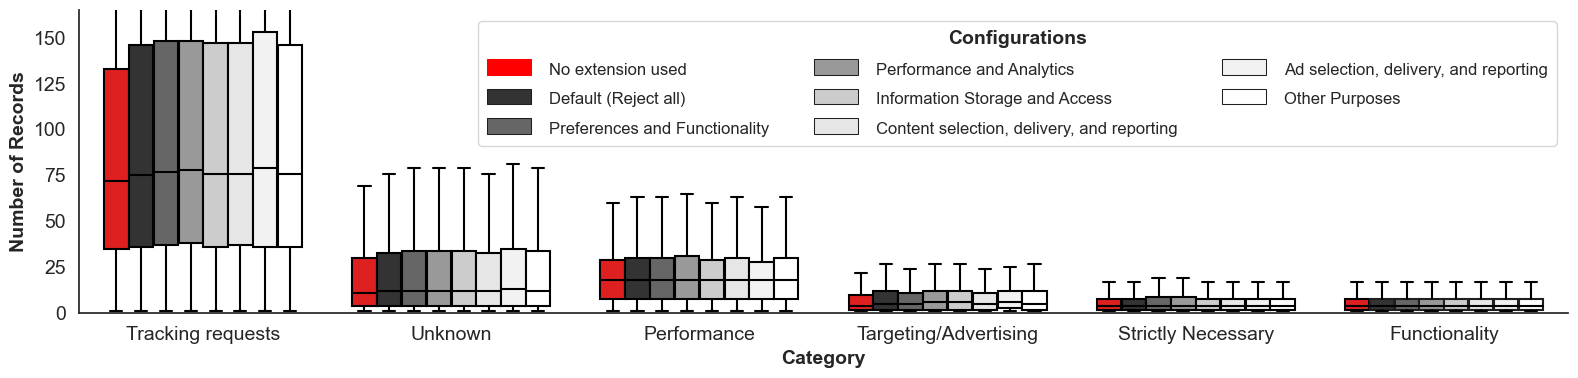

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib

# Read CSV file
df = pd.read_csv(os.getcwd() + '/datasets-plots/p11_stats_omatic_all_settings.zip')

# Replace the 'browser_id' with the given mapping
df['browser_id'].replace({
    'openwpm_nothing': 'No extension used',
    'openwpm_omatic':  'Default (Reject all)',
    'openwpm_omaticA': 'Preferences and Functionality',
    'openwpm_omaticB': 'Performance and Analytics',
    'openwpm_omaticC': 'Information Storage and Access',
    'openwpm_omaticD': 'Content selection, delivery, and reporting',
    'openwpm_omaticE': 'Ad selection, delivery, and reporting',
    'openwpm_omaticF': 'Other Purposes'
}, inplace=True)


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = False

matplotlib.rcParams['axes.labelweight'] = 'bold'
sns.set(rc={'figure.figsize': (16, 5), "font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14,
       "legend.fontsize": 16, "legend.title_fontsize": 14, "xtick.labelsize": 14, "ytick.labelsize": 14}, style="white")

# Create consistent category order
category_order = df['category'].unique()

# Set up a dictionary of colors for each unique 'browser_id'
color_dict = {
    'No extension used': '#FF0000',  # Black
    'Default (Reject all)': '#333333',
    'Preferences and Functionality': '#666666',
    'Performance and Analytics': '#999999',
    'Information Storage and Access': '#CCCCCC',
    'Content selection, delivery, and reporting': '#E6E6E6',
    'Ad selection, delivery, and reporting': '#F2F2F2',
    'Other Purposes': '#FFFFFF'  # White
}

# Manually set the order of 'browser_id'
browser_order = ['No extension used', 'Default (Reject all)'] + [browser for browser in df['browser_id'].unique() if browser not in ['No extension used', 'Default (Reject all)']]

# Create box plot
fig, ax = plt.subplots(figsize=(16, 4))

# Plot the boxplots with the color_dict for palette
sns.boxplot(
    showfliers=False,
    data=df,
    x='category',
    y='ct',
    hue='browser_id',
    palette=color_dict,
    ax=ax,
    order=category_order,
    hue_order=browser_order
)

ax.set_xlabel('Category')
ax.set_ylabel('Number of Records')
ax.tick_params(axis='x', rotation=0)

# Remove the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([0, 165])

# Get the legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Find the index of the legend label you want to make black
legend_index = labels.index('No extension used')

# Modify the color of the legend label and the corresponding line
handles[legend_index].set_color('#FF0000')
labels[legend_index] = 'No extension used'

# Number of columns in legend
ncol = int(len(browser_order) / 3)

# Update the legend with the modified handles and labels
ax.legend(handles, labels, title='Configurations', loc='upper right', title_fontsize='14', ncol=3)

# Set legend title to bold
plt.setp(ax.get_legend().get_title(), weight='bold')

# Font size of the legend labels
plt.setp(ax.get_legend().get_texts(), fontsize='12')

# Iterate over the boxes and set the color of the specific boxplot to the corresponding color in color_dict
for i, artist in enumerate(ax.artists):
    col = color_dict[browser_order[i % len(browser_order)]]
    artist.set_edgecolor('black')
    if i == 40:
        break
    #print(i, print(len(ax.lines)), i*6, i*6+6)
    for j in range(i*6, i*6+6):
        ax.lines[j].set_color('black')
        ax.lines[j].set_mfc(col)
        ax.lines[j].set_mec(col)
        #ax.patch.set_edgecolor('black')  

plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'plots', 'p11_stats_omatic_all_settings.pdf'), dpi=600, transparent=False,
            bbox_inches='tight', format="pdf")


## Figure 7: Number of cookies in the different profiles by cookie usage category.

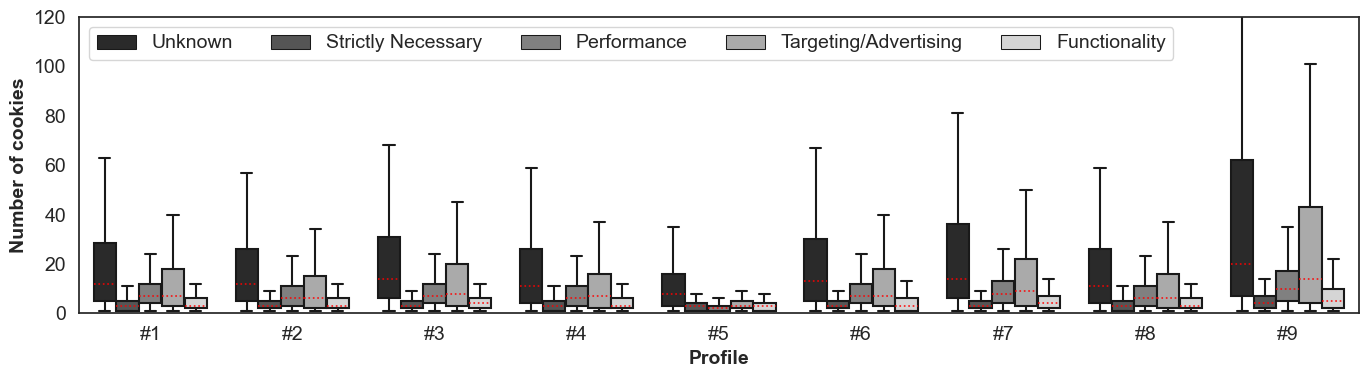

In [7]:
from turtle import position
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import matplotlib

# Data preparation
df = pd.read_csv(
    os.getcwd() + '/datasets-plots/p4_cookie_cats_per_site_per_profile.csv')

# Plot adjustments
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['axes.labelweight'] = 'bold'
sb.set(rc={'figure.figsize': (14, 4), "font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14,
       "legend.fontsize": 14, "xtick.labelsize": 14, "ytick.labelsize": 14}, style="white")

# Generate and safe/show plot
boxplot = sb.boxplot(x="alias", y="ct",
                     hue="category",
                     data=df, showfliers=False,
                     medianprops=dict(color="red", alpha=0.9,
                                      linestyle=':', linewidth=1.2),
                     flierprops=dict(markerfacecolor="#707070",
                                     marker="o", markersize=1), palette="gray")

boxplot.set(ylim=(0, 120))
plt.legend(loc='upper left', frameon=True, ncol=9)
plt.xlabel("Profile")
plt.ylabel('Number of cookies')
plt.tight_layout()

plt.savefig(os.path.join(os.getcwd(), 'plots', 'p4_cookie_cats_per_site_per_profile_2.pdf'), dpi=600, transparent=False,
            bbox_inches='tight', format="pdf")